In [10]:
!pip install dtreeviz

In [11]:
import graphviz.backend as be

In [12]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg,SVG

In [13]:
clas = tree.DecisionTreeClassifier()
iris = load_iris()

X_train = iris.data
y_train = iris.target

clas.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

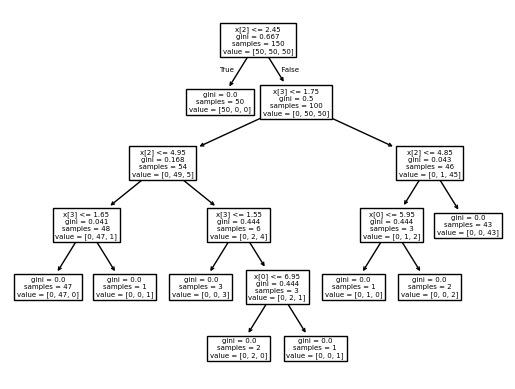

In [14]:
from sklearn.tree import plot_tree
plot_tree(clas)

# 1. Classification

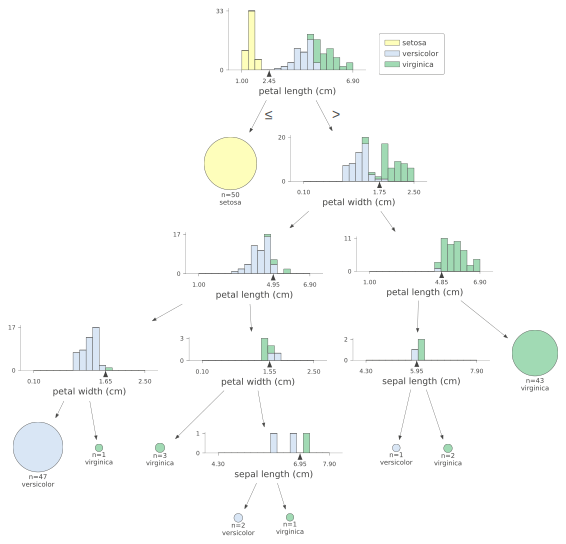

In [15]:
from dtreeviz import model

viz = model(clas,
            X_train,
            y_train,
            feature_names=iris.feature_names,
            class_names=['setosa', 'versicolor', 'virginica'])
viz.view()

# 2. Regression

(506, 14)
1     CRIM  ZN INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATIO  \
0  0.00632  18  2.31    0  0.538  6.575  65.2    4.09   1  296    15.3   
1  0.02731   0  7.07    0  0.469  6.421  78.9  4.9671   2  242    17.8   
2  0.02729   0  7.07    0  0.469  7.185  61.1  4.9671   2  242    17.8   
3  0.03237   0  2.18    0  0.458  6.998  45.8  6.0622   3  222    18.7   
4  0.06905   0  2.18    0  0.458  7.147  54.2  6.0622   3  222    18.7   

1       B LSTAT  MEDV  
0   396.9  4.98    24  
1   396.9  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4   396.9  5.33  36.2  
(506, 14)
1     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222    

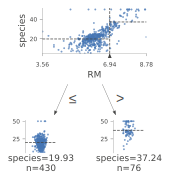

In [66]:
import pandas as pd
import numpy as np # Import numpy

regr = tree.DecisionTreeRegressor(max_depth = 1)
boston = pd.read_csv('/content/boston_house_prices.csv',header = None)
boston = boston.drop(index = 0)
boston.columns = boston.iloc[0]
boston = boston.drop(index = boston.index[0])
boston = boston.reset_index(drop = True)
print(boston.shape)
print(boston.head())

# Convert all columns to numeric, coercing errors to NaN
boston = boston.apply(pd.to_numeric, errors='coerce')
# Drop rows with NaN values that resulted from the conversion
boston = boston.dropna()
print(boston.shape) # Print shape after dropping NaNs
print(boston.head()) # Print head after conversion and dropping NaNs

X_train = boston.iloc[:, :-1].values
y_train = boston.iloc[:, -1].values # Convert to NumPy array

regr.fit(X_train,y_train)

viz = model(regr,
               X_train,
               y_train,
               target_name='species',
               feature_names=boston.columns.tolist() # Ensure feature names are a list of strings
               )
viz.view()

# 3. Horizontal Decision Tree...

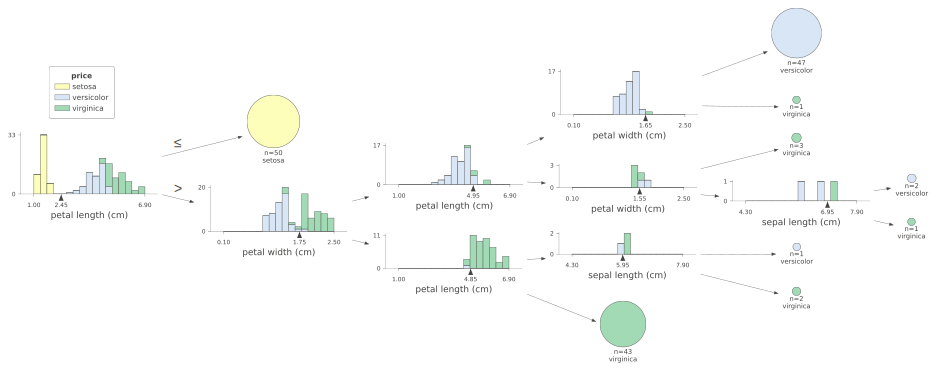

In [17]:
viz = model(clas,
               iris.data, # Use iris.data for X_train
               iris.target, # Use iris.target for y_train
               target_name='price',
               feature_names=iris.feature_names,
               class_names=["setosa", "versicolor", "virginica"])
viz.view(orientation='LR')

# 4. Show Prediction Path

Decision path for sample index 94:
Node 0: (X[3] = 1.3) > 0.800000011920929
Node 2: (X[3] = 1.3) <= 1.75
Node 3: (X[2] = 4.2) <= 4.950000047683716
Node 4: (X[3] = 1.3) <= 1.6500000357627869
--> Reached leaf node 5


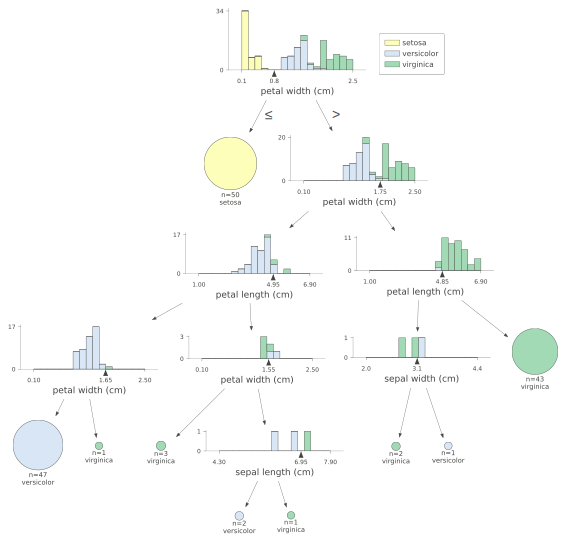

In [44]:

from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np

# Load data and train the classifier
clas = tree.DecisionTreeClassifier()
iris = load_iris()
X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

# Select a random sample
sample_index = np.random.randint(0, len(X_train))
X = X_train[sample_index].reshape(1, -1)  # Reshape for a single sample

# Get decision path
node_indicator = clas.decision_path(X)
leaf_id = clas.apply(X)

# Print path
feature = clas.tree_.feature
threshold = clas.tree_.threshold

print(f"Decision path for sample index {sample_index}:")
for node_id in node_indicator.indices:
    if leaf_id[0] == node_id:
        print(f"--> Reached leaf node {node_id}")
        continue

    if X[0, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(f"Node {node_id}: (X[{feature[node_id]}] = {X[0, feature[node_id]]}) "
          f"{threshold_sign} {threshold[node_id]}")




clas = tree.DecisionTreeClassifier()
iris = load_iris()

X_train = iris.data
y_train = iris.target

clas.fit(X_train,y_train)

X = iris.data[np.random.randint(0,len(iris.data)),:]

viz = model(clas,
            X_train,
            y_train,
            feature_names = iris.feature_names,
            class_names = ['setosa','versicolor','virginica'],
            )
viz.view()




In [36]:
X

array([5.5, 2.3, 4. , 1.3])

# 5. Show Node Number ....

In [50]:
!pip install -U dtreeviz

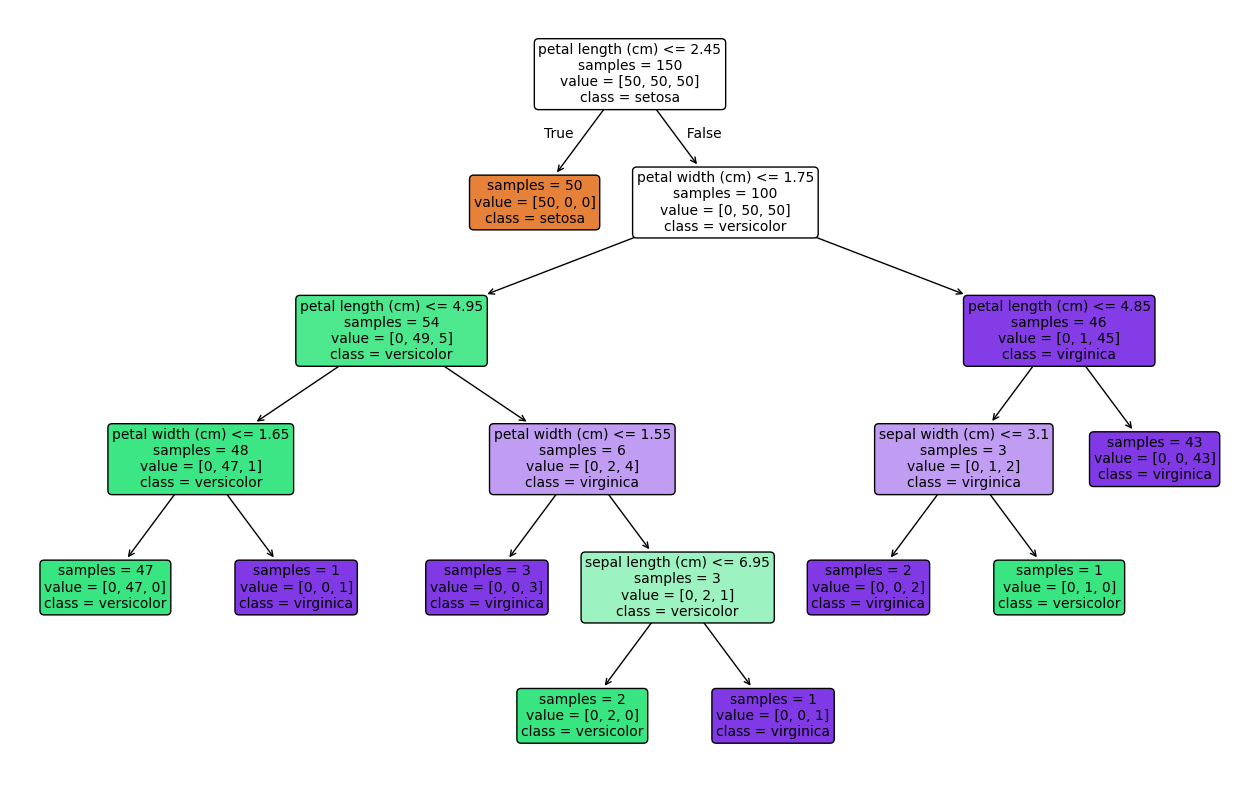

In [56]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset and train model
iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier().fit(X, y)

# Plot the tree with node IDs
plt.figure(figsize=(16, 10))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=False,
          label='all')  # This will show node IDs
plt.show()

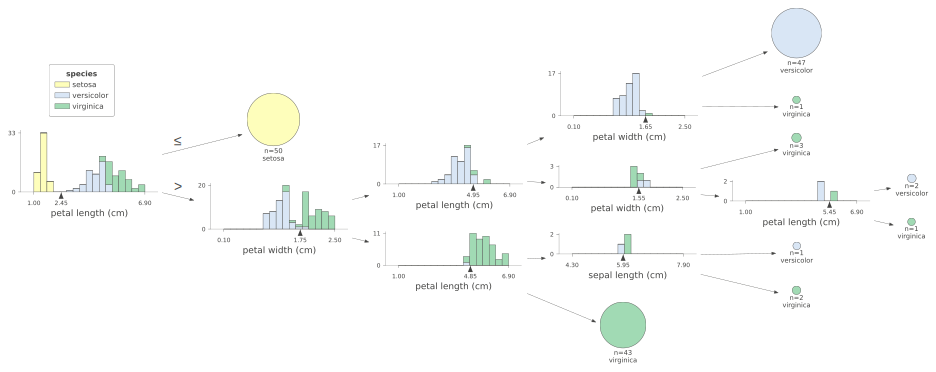

In [65]:
viz = model(clas,
               X_train,
               y_train,
               target_name='species',
               feature_names=iris.feature_names,
               class_names=["setosa", "versicolor", "virginica"],



               )
viz.view( orientation='LR',)

# 7. Show just prediction path, nothing else

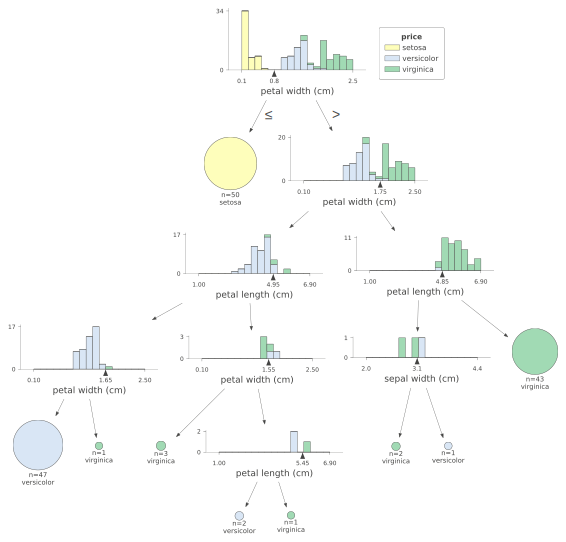

In [79]:
clas = tree.DecisionTreeClassifier()
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = model(clas,
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names,
               class_names=["setosa", "versicolor", "virginica"],

               )
viz.view()

# 10. Univariate Regression
